In [39]:
from matplotlib import pyplot
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import log
import pandas_profiling
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
kw_list1 = ['Roofing materials']
kw_list2 = ['GAF Timberline HD']
kw_list3 = ['Carlisle']
kw_list4 = ['gaf shingles']

In [4]:
pytrends.build_payload(kw_list1, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df1 = pytrends.interest_over_time()
interest_over_time_df1 = interest_over_time_df1.drop(columns=['isPartial'])

In [5]:
pytrends.build_payload(kw_list2, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df2 = pytrends.interest_over_time()
interest_over_time_df2 = interest_over_time_df2.drop(columns=['isPartial'])

In [6]:
pytrends.build_payload(kw_list3, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df3 = pytrends.interest_over_time()
interest_over_time_df3 = interest_over_time_df3.drop(columns=['isPartial'])

In [7]:
pytrends.build_payload(kw_list4, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df4 = pytrends.interest_over_time()
interest_over_time_df4 = interest_over_time_df4.drop(columns=['isPartial'])

In [8]:
interest_over_time_df = pd.concat([interest_over_time_df1,interest_over_time_df2,interest_over_time_df3,interest_over_time_df4], axis=1)
print(interest_over_time_df)

            Roofing materials  GAF Timberline HD  Carlisle  gaf shingles
date                                                                    
2014-09-21                 85                 37        72            69
2014-09-28                 71                 49        79            67
2014-10-05                 66                 21        71            62
2014-10-12                 83                 25        75            91
2014-10-19                 83                 33        70            72
...                       ...                ...       ...           ...
2019-08-18                 70                 84        92            85
2019-08-25                 68                 50        77            97
2019-09-01                 60                 60        77            70
2019-09-08                 60                 64        79            92
2019-09-15                 45                 19        69            75

[261 rows x 4 columns]


In [13]:
#EDA
pandas_profiling.ProfileReport(interest_over_time_df)

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.5/dist-packages/pandas_profiling/base.py:319: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,261
Total Missing (%),0.0%
Total size in memory,10.3 KiB
Average record size in memory,40.5 B
Numeric,4
Categorical,0
Date,1
Text (Unique),0
Rejected,0
Distinct count,39


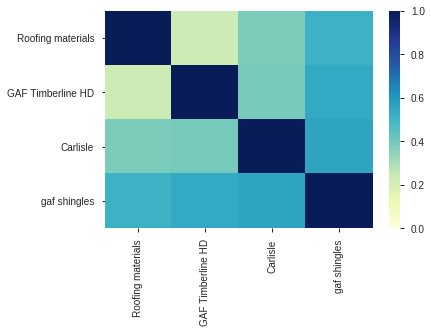

In [26]:
pd.plotting.register_matplotlib_converters()
sns.heatmap(interest_over_time_df.corr(),vmin=0, vmax=1,cmap="YlGnBu")

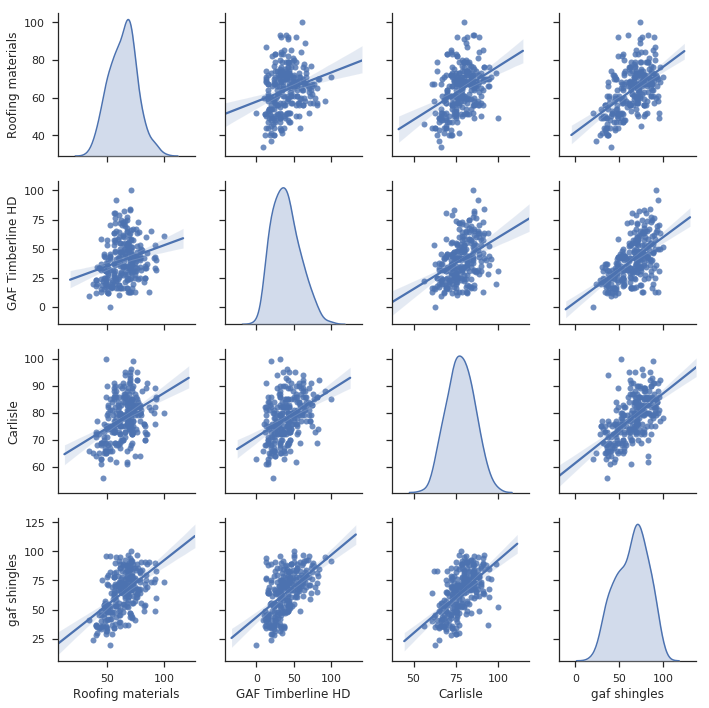

In [60]:
sns.pairplot(interest_over_time_df,kind="reg", diag_kind="kde")

In [20]:
# interest_over_time_df['gaf shingles'].corr(interest_over_time_df['GAF Timberline HD'])

0.5441251336078916

In [70]:
CorrData = interest_over_time_df[['gaf shingles','GAF Timberline HD']]
corrPearson = CorrData.corr(method='pearson')
corrSpearman = CorrData.corr(method='spearman')
print("corrPearson \n",corrPearson)
print("\n================================================")
print( "corrSpearman \n",corrSpearman)

corrPearson 
                    gaf shingles  GAF Timberline HD
gaf shingles           1.000000           0.544125
GAF Timberline HD      0.544125           1.000000

corrSpearman 
                    gaf shingles  GAF Timberline HD
gaf shingles           1.000000           0.541751
GAF Timberline HD      0.541751           1.000000


In [71]:
CorrData1 = interest_over_time_df[['gaf shingles','Roofing materials']]
corrPearson1 = CorrData1.corr(method='pearson')
corrSpearman1 = CorrData1.corr(method='spearman')
print("corrPearson \n",corrPearson1)
print("\n================================================")
print( "corrSpearman \n",corrSpearman1)

corrPearson 
                    gaf shingles  Roofing materials
gaf shingles           1.000000           0.513593
Roofing materials      0.513593           1.000000

corrSpearman 
                    gaf shingles  Roofing materials
gaf shingles           1.000000           0.489319
Roofing materials      0.489319           1.000000


In [72]:
CorrData2 = interest_over_time_df[['GAF Timberline HD','Roofing materials']]
corrPearson2 = CorrData2.corr(method='pearson')
corrSpearman2 = CorrData2.corr(method='spearman')
print("corrPearson \n",corrPearson2)
print("\n================================================")
print( "corrSpearman \n",corrSpearman2)

corrPearson 
                    GAF Timberline HD  Roofing materials
GAF Timberline HD           1.000000           0.234284
Roofing materials           0.234284           1.000000

corrSpearman 
                    GAF Timberline HD  Roofing materials
GAF Timberline HD           1.000000           0.249831
Roofing materials           0.249831           1.000000


In [73]:
CorrData3 = interest_over_time_df[['Carlisle','Roofing materials']]
corrPearson3 = CorrData3.corr(method='pearson')
corrSpearman3 = CorrData3.corr(method='spearman')
print("corrPearson \n",corrPearson3)
print("\n================================================")
print( "corrSpearman \n",corrSpearman3)

corrPearson 
                    Carlisle  Roofing materials
Carlisle           1.000000           0.380832
Roofing materials  0.380832           1.000000

corrSpearman 
                    Carlisle  Roofing materials
Carlisle           1.000000           0.379245
Roofing materials  0.379245           1.000000


In [69]:
CorrP = interest_over_time_df.corr(method='pearson')
CorrS = interest_over_time_df.corr(method='spearman')
print("corrPearson \n",CorrP)
print("\n===================================================================")
print( "corrSpearman \n",CorrS)

corrPearson 
                    Roofing materials  GAF Timberline HD  Carlisle  \
Roofing materials           1.000000           0.234284  0.380832   
GAF Timberline HD           0.234284           1.000000  0.391232   
Carlisle                    0.380832           0.391232  1.000000   
gaf shingles                0.513593           0.544125  0.565826   

                   gaf shingles  
Roofing materials      0.513593  
GAF Timberline HD      0.544125  
Carlisle               0.565826  
gaf shingles           1.000000  

corrSpearman 
                    Roofing materials  GAF Timberline HD  Carlisle  \
Roofing materials           1.000000           0.249831  0.379245   
GAF Timberline HD           0.249831           1.000000  0.408840   
Carlisle                    0.379245           0.408840  1.000000   
gaf shingles                0.489319           0.541751  0.582902   

                   gaf shingles  
Roofing materials      0.489319  
GAF Timberline HD      0.541751  
Carlis